In [1]:
#Hugh MacDonald 40264778

In [2]:
#assignment 2, I'll be making a hockey rink (5px = 1 foot)

In [3]:
#importing packages
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
#patches is a collection of patches like circles and polygons
import numpy as np

(np.float64(0.0), np.float64(200.0), np.float64(0.0), np.float64(85.0))

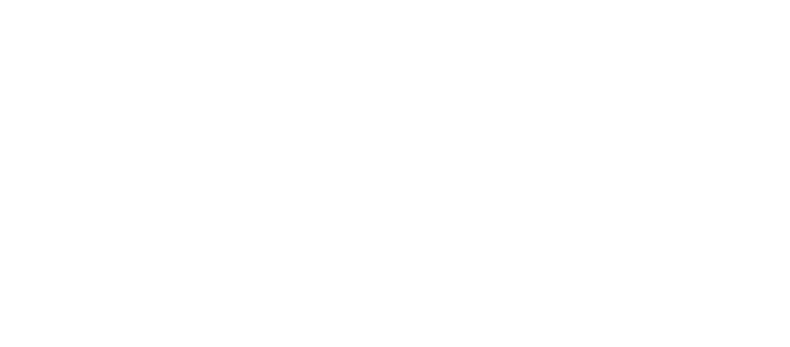

In [4]:
#defining rink as a plot
#subplots is a tuple, figure and axes.
#making figsize 1000 pixels, would mean that a 200 x 85 feet = 1000 x 425 pixels
# 5 pixels = 1 foot 

#standard dpi, dots per inch = 100
#way figzise works is unit x dpi, so 10 x 100 =1000 pixels wide,
#4.25 x 100 =425 pixels high

rink,axes = plt.subplots(figsize = (10,4.25),dpi = 100)

#making rink's dimensions, standard unit = FEET
    #nhl standard 200 x 85 feet
axes.set_xlim(0,200)
axes.set_ylim(0,85)

#making aspect ratio equal so scaling of axes doesn't warp shapes
    #was making circle earlier and it became ellipse because of axes scaling
axes.set_aspect('equal')
axes.axis('off')



In [5]:
#defining center ice, 2 circles.
#middle circle is 1 foot in diameter
center_ice_mid = ptc.Circle((100,42.5), radius = 0.5, facecolor = 'blue')

#outer ring radius of 15 feet, thickness of 2 inches = 1/6
center_ice_outer = ptc.Circle ((100,42.5), radius = 15, facecolor = 'none', edgecolor = 'blue', linewidth = 1/6)

#adding center ice
axes.add_patch(center_ice_mid)
axes.add_patch(center_ice_outer)

In [14]:
#adding boards, each corner is an arc with 28 foot radius
    #arc command arguments: tuple for center, total width, total height, 
    #angle = rotation, theta1 = start angle from x axis, theta2 = end angle from x axis.
    #linewidth of 2 just so the edges are a bit thicker
tlboard = ptc.Arc((28,85-28),56,56, 
                    angle = 0, theta1 = 90, theta2 = 180, linewidth = 2)
blboard = ptc.Arc((28,28),56,56, 
                    angle = 0, theta1 = 180, theta2 = 270, linewidth = 2)
trboard = ptc.Arc((200-28,85-28),56,56, 
                    angle = 0, theta1 = 0, theta2 = 90, linewidth = 2)
brboard = ptc.Arc((200-28,28),56,56, 
                    angle = 0, theta1 = 270, theta2 = 0, linewidth = 2)
#adding each to the rink
for x in [tlboard,blboard,trboard,brboard]:
    axes.add_patch(x)
    
#still needs straight sections of the boards
#using axes.plot to make a line from one coordinate to antoher. 
    #note that it is in format [x1,x2], [y1,y2] to map (x1,y1) to (x2,y2)
#bottom line
axes.plot([28,200-28],[0,0],color = 'black', linewidth = 2)
#top line
axes.plot([28,200-28],[85,85],color = 'black', linewidth = 2)
#left line
axes.plot([0,0],[28,85-28],color = 'black', linewidth = 2)
#right line 
axes.plot([200,200],[28,85-28],color = 'black', linewidth = 2)

In [7]:
#now adding red and blue lines 

#centerline, red line in centter with thickness of 1 foot
axes.plot([100,100],[0,85],color ='red', linewidth = 1)

#blue lines, dark blue with thickness of 1 foot dividing the rink into thirds
axes.plot([75,75],[0,85], color = 'darkblue', linewidth = 1)
axes.plot([125,125],[0,85], color = 'darkblue', linewidth = 1)

#goal lines, 11 feet from sides, width of 2 inches = 1/6
#intersects the boards' arc at y=28-sqrt(28**2 - 17**2)
arcpt = 28 - (28**2-17**2)**(1/2)
axes.plot([11,11],[arcpt,85-arcpt],color = 'red', linewidth = 1/6)
axes.plot([200-11,200-11],[arcpt,85-arcpt],color = 'red', linewidth = 1/6)

In [8]:
#now adding goal creases.
#goal crease is centered along goal line, boxed with arc as one side
#note that nhl crease is different from other leagues

#making left goal crease
#starting with lines 4 feet off center which meet an arc of radius 6, thickness of 2 inches = 1/6
axes.plot([11,11+20**(1/2)],[42.5-4,42.5-4],color = 'red', linewidth = 1/6)
axes.plot([11,11+20**(1/2)],[42.5+4,42.5+4],color = 'red', linewidth = 1/6)
#making arc 
#need to import math for arcsin function for angles
import math
#angle1 is where the arc starts and ends
#doing some trig and converting to degrees
angle1 = 180/math.pi*math.asin(2/3)
#making arc of left goal crease
goal_crease_arc_left = ptc.Arc((11,42.5),12,12, 
                                angle = 0, theta1 = -angle1, theta2 = angle1,
                                color = 'red', linewidth = 1/6)
axes.add_patch(goal_crease_arc_left)
#making right goal crease
axes.plot([200-11-20**(1/2),200-11],[42.5-4,42.5-4],color = 'red', linewidth = 1/6)
axes.plot([200-11-20**(1/2),200-11],[42.5+4,42.5+4],color = 'red', linewidth = 1/6)
goal_crease_arc_right = ptc.Arc((200-11,42.5),12,12,
                                angle = 180, theta1 = -angle1, theta2 = angle1,
                                color = 'red', linewidth = 1/6)
axes.add_patch(goal_crease_arc_right)



In [9]:
#adding goals now, 6 feet by 40 inches with arced sides, going to 88 inches
#trying to mimic the sides of the goal with a half line and arc
#did some trig to find arc radius = 20.5/2 in
#first plotting back of goal, then arcs that connect it to goal line

#left goal first
    #NOTE that actual goal distance is 6 feet in the back,
    #removing 6 inches so it looks cleaner with the arcs (less boxy)
#adding back line and side lines
axes.plot([11-40/12,11-40/12],[42.5-2.5,42.5+2.5],color = 'red')
axes.plot([11,11-20/12],[42.5+2.5,42.5+2.5],color = 'red')
axes.plot([11,11-20/12],[42.5-2.5,42.5-2.5],color = 'red')

#found angle for start and finish of arc on paper using trig 
angle2 = 180/math.pi*math.atan(20/4.5)

#coding arcs for goal
goal_arc_tl = ptc.Arc((11- 20/12 -10/12,42.5+(44-20.5)/12), 20.5/12, 20.5/12, 
                      angle = 90, theta1 = -angle2, theta2 = angle2,
                      color = 'red' )
goal_arc_bl = ptc.Arc((11- 20/12 -10/12,42.5-(44-20.5)/12), 20.5/12, 20.5/12, 
                      angle = -90, theta1 = -angle2, theta2 = angle2,
                      color = 'red' )

#now adding right goal, starting with the back and side lines
axes.plot([200-11+40/12,200-11+40/12],[42.5-2.5,42.5+2.5],color = 'red')
axes.plot([200-11,200-11+20/12],[42.5+2.5,42.5+2.5],color = 'red')
axes.plot([200-11,200-11+20/12],[42.5-2.5,42.5-2.5],color = 'red')

#arcs 
goal_arc_tr = ptc.Arc((200-11+20/12 +10/12,42.5+(44-20.5)/12), 20.5/12, 20.5/12, 
                      angle = 90, theta1 = -angle2, theta2 = angle2,
                      color = 'red' )
goal_arc_br = ptc.Arc((200-11+20/12 +10/12,42.5-(44-20.5)/12), 20.5/12, 20.5/12, 
                      angle = -90, theta1 = -angle2, theta2 = angle2,
                      color = 'red' )

#adding earlier defined arcs
for x in [goal_arc_tl, goal_arc_bl, goal_arc_tr, goal_arc_br]:
    axes.add_patch(x)

In [10]:
#now adding faceoff zones
#neutral faceoff zones are 20 feet from the centerline, 44 feet apart vertically
#Diameter = 2 feet
#doing this by making a list of coordinates for the circles, with for loop
#empty list to add circles to
neutral_faceoff = []
for x in [(100 - 20, 42.5 + 22),(100 - 20, 42.5 - 22),(100 + 20, 42.5 - 22), (100 + 20, 42.5 + 22)]:
    neutral_faceoff.append(ptc.Circle(x, radius = 1, facecolor = 'red'))
#adding circles to rink
for x in neutral_faceoff:
    axes.add_patch(x)

#adding non defensive faceoff zones
#these have a circle around the spot with a 30 foot diameter, 2 inch thickness
#20 feet from the goal line, same y from centerline 
#empty list to add to 
defensive_faceoff = []
#listing coordinates of defensive faceoff zones
df_coords = [(11+20, 42.5+22),(11+20,42.5-22),(200-11-20,42.5+22),(200-11-20,42.5-22)]

#using coord list to create inner spot and outer ring
for x in df_coords:
    #inner spot
    defensive_faceoff.append(ptc.Circle(x, radius = 1, facecolor = 'red'))
    #outer ring
    defensive_faceoff.append(ptc.Circle(x, radius = 15, facecolor = 'none', edgecolor = 'red', linewidth = 1/6))
#adding circles to rink
for x in defensive_faceoff:
    axes.add_patch(x)

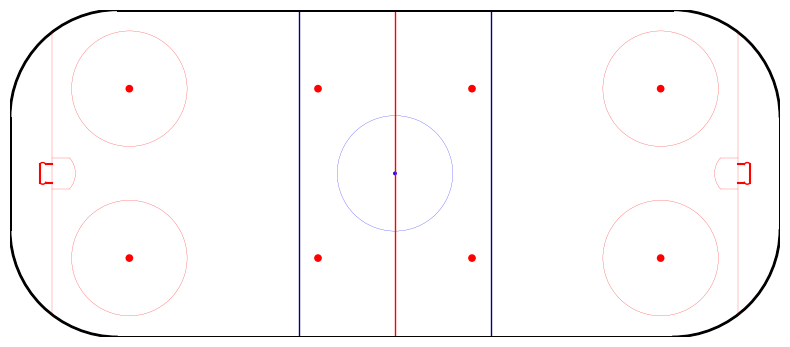

In [15]:

rink

In [ ]:
#exporting as png

In [16]:
rink.savefig("A2rink.png")